## Plots for Distribution of Degree over EC classes  

In [4]:
import numpy as np
import seaborn as sns
import json
from matplotlib import pyplot as plt
from palettable.mycarta import Cube1_6
from palettable.mycarta import Cube1_7
sns.set() # S
sns.set_context("paper")
sns.set_style(style='whitegrid')


In [6]:
def load_json(path):
    ''' 
    Loads jsons given a path. 
    '''
    with open(path,'r') as f:
        data = json.load(f)
    return data



class Domain:

    def __init__(self,name):

        self.name = name
        
        self.path_degree = "../results/topology/degree/degree_distribution_over_EC_%s.json"%(self.name)
        
        self.path_betweenness = "../results/topology/betweenness/betweenness_distribution_over_EC_%s.json"%(self.name)

        cb = {'black':[0,0,0], 'orange':[230/255,159/255,0], 'skyblue':[86/255,180/255,233/255],
        'bluishgreen':[0,158/255,115/255], 'yellow':[240/255,228/255,66/255],'blue':[0,114/255,178/255],
        'vermillion':[213/255,94/255,0],'reddishpurple':[204/255,121/255,167/255], 'brown':[109, 22, 3]}

        #'brown': HEX #6D1603 RGB 109, 22, 3  HSL 11, 97%, 22%
        color = {'Metagenome': cb['bluishgreen'],
            'Bacteria': cb['blue'],
            'Archaea': cb['vermillion'],
            'Eukaryota': cb['orange'],
            'Pantaxa': cb['reddishpurple'],    
            'LUCA': cb['black'],
            'Biosphere': cb['skyblue']}

        self.color = color[self.name]
    

cmap = Cube1_6.mpl_colors

ec_class_name = {'1':'oxidoreductases',
     '2':'transferases',
    '3': 'hydrolases',
    '4': 'lyases',
    '5': 'isomerases',
    '6': 'ligases'}

color = {'oxidoreductases': cmap[0],
        'transferases': cmap[1],
        'hydrolases': cmap[2],
        'lyases': cmap[3],
        'isomerases': cmap[4],
        'ligases': cmap[5]}


ncmap = Cube1_7.mpl_colors

new_ec_class_name = {'1':'oxidoreductases',
     '2':'transferases',
    '3': 'hydrolases + lyases',
    '4': 'isomerases',
    '5': 'ligases'}

ncolor = {'oxidoreductases': ncmap[0],
        'transferases': ncmap[1],
        'hydrolases + lyases': ncmap[3],
        'isomerases': ncmap[5],
        'ligases': ncmap[6]}

In [7]:
archaea = Domain('Archaea')
bacteria = Domain('Bacteria')
eukaryota = Domain('Eukaryota')
metagenome = Domain('Metagenome')
luca = Domain("LUCA")
biosphere = Domain("Biosphere")
pantaxa = Domain("Pantaxa")


### load degree

In [8]:
list_domain = [archaea, bacteria, eukaryota, pantaxa, metagenome] #, biosphere]

data = dict()
for domain in list_domain:
    data[domain] = load_json(domain.path_degree)

### plots for degree (logX with same bin size)

In [9]:
# plt.figure(figsize=(2.1 * len(list_domain), 2 * len(ec_class_name))) 
# j = 1
# for ec_index in range(1, len(ec_class_name) + 1):#for domain in list_domain:
#     i = 0
#     for domain_index in range(len(list_domain)): #for ec_index in range(1, len(ec_class_name) + 1):
# 
#         print(domain_index + j)
# 
#         domain = list_domain[domain_index]
#         plt.subplot(len(ec_class_name), len(list_domain), domain_index + j)
# 
#         ec_class = str(ec_index) 
#         x = data[domain][ec_class]
#         x = [i for i in x if i > 0]
#         lx = np.log10(x)   
# 
#         plt.hist(lx, histtype='step', bins=200, log=True, fill=True, alpha=0.7, label=ec_class_name[ec_class], color=color[ec_class_name[ec_class]])
#         ax = plt.gca()
#         ax.tick_params(labelsize=12)
#         ax.set_xlim([0,3.2])
#         ax.set_ylim([0,600000])
#         plt.xticks([1, 2, 3], ['$10^{1}$', '$10^{2}$', '$10^{3}$'])
#         plt.yticks([10, 1000, 100000], ['$10^1$', '$10^3$', '$10^5$'])
# 
# 
#         if domain == archaea:
#             plt.ylabel("%s\n"%ec_class_name[ec_class], fontsize= 18)
#         if ec_index == 1:
#             plt.title("%s\n"%domain.name, fontsize= 18)
#         if domain == eukaryota and ec_index == 6:
#             plt.xlabel("Degree", fontsize=22)
# 
#         i += 1
#     j += i    
# 
# plt.tight_layout()
# plt.savefig("../plots/PNAS/degree_distribution.png", dpi = 300)

### plots for degree (linearx)

In [10]:
# plt.figure(figsize=(2.1 * len(list_domain), 2 * len(ec_class_name))) #sharex=True, sharey=True)
# j = 1
# for ec_index in range(1, len(ec_class_name) + 1):#for domain in list_domain:
#     i = 0
#     for domain_index in range(len(list_domain)): #for ec_index in range(1, len(ec_class_name) + 1):
# 
#         print(domain_index + j)
# 
#         domain = list_domain[domain_index]
#         plt.subplot(len(ec_class_name), len(list_domain), domain_index + j)
#     
#         ec_class = str(ec_index) 
#         x = data[domain][ec_class]
# 
#         plt.hist(x, histtype='step', bins=200, log=True, fill=True, alpha=0.7, label=ec_class_name[ec_class], color=color[ec_class_name[ec_class]])
#         ax = plt.gca()
#         ax.tick_params(labelsize=12)
#         ax.set_xlim([0,1450])
#         ax.set_ylim([0,600000])
#         # plt.xticks([1, 2, 3], ['$10^{1}$', '$10^{2}$', '$10^{3}$'])
#         # plt.yticks([10, 1000, 100000], ['$10^1$', '$10^3$', '$10^5$'])
#         
#         if domain == archaea:
#             plt.ylabel("%s\n"%ec_class_name[ec_class], fontsize= 18)
#         if ec_index == 1:
#             plt.title("%s\n"%domain.name, fontsize= 18)
#         if domain == eukaryota and ec_index == 6:
#             plt.xlabel("Degree", fontsize=22)
#             
#         i += 1
#     j += i    
# 
# plt.tight_layout()
# plt.savefig("../plots/PNAS/degree_distribution-linearx.png", dpi = 300)


### plots for degree (logx)

In [11]:
# plt.figure(figsize=(2.1 * len(list_domain), 2 * len(ec_class_name))) #sharex=True, sharey=True)
# j = 1
# for ec_index in range(1, len(ec_class_name) + 1):#for domain in list_domain:
#     i = 0
#     for domain_index in range(len(list_domain)): #for ec_index in range(1, len(ec_class_name) + 1):
# 
#         print(domain_index + j)
# 
#         domain = list_domain[domain_index]
#         plt.subplot(len(ec_class_name), len(list_domain), domain_index + j)
#     
#         ec_class = str(ec_index) 
#         x = data[domain][ec_class]
# 
#         plt.hist(x, histtype='step', bins=200, log=True, fill=True, alpha=0.7, label=ec_class_name[ec_class], color=color[ec_class_name[ec_class]])
#         ax = plt.gca()
#         ax.tick_params(labelsize=12)
#         #ax.set_xlim([0,1450])
#         #ax.set_ylim([0,600000])
#         plt.xscale('log')
#         ax.set_ylim([0,600000])
#         ax.set_xlim([0,1450])
#         plt.xticks([10, 100, 1000], ['$10^{1}$', '$10^{2}$', '$10^{3}$'])
#         plt.yticks([10, 1000, 100000], ['$10^1$', '$10^3$', '$10^5$'])
#         
#         
#         if domain == archaea:
#             plt.ylabel("%s\n"%ec_class_name[ec_class], fontsize= 18)
#         if ec_index == 1:
#             plt.title("%s\n"%domain.name, fontsize= 18)
#         if domain == eukaryota and ec_index == 6:
#             plt.xlabel("Degree", fontsize=22)
#             
#         i += 1
#     j += i    
# 
# plt.tight_layout()
# plt.savefig("../plots/PNAS/degree_distribution-logx.png", dpi = 300)



## Combine hydrolases and lysases


### plot degree for combined HL

1
oxidoreductases
2
oxidoreductases
3
oxidoreductases
4
oxidoreductases
5
oxidoreductases
6
transferases
7
transferases
8
transferases
9
transferases
10
transferases
11
hydrolases + lyases
12
hydrolases + lyases
13
hydrolases + lyases
14
hydrolases + lyases
15
hydrolases + lyases
16
17
18
19
20
16
isomerases
17
isomerases
18
isomerases
19
isomerases
20
isomerases
21
ligases
22
ligases
23
ligases
24
ligases
25
ligases


<ipython-input-20-3f33cbf9a365>:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,1000000])
<ipython-input-20-3f33cbf9a365>:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,1000000])
<ipython-input-20-3f33cbf9a365>:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,1000000])
<ipython-input-20-3f33cbf9a365>:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,1000000])
<ipython-input-20-3f33cbf9a365>:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,1000000])
<ipython-input-20-3f33cbf9a365>:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
 

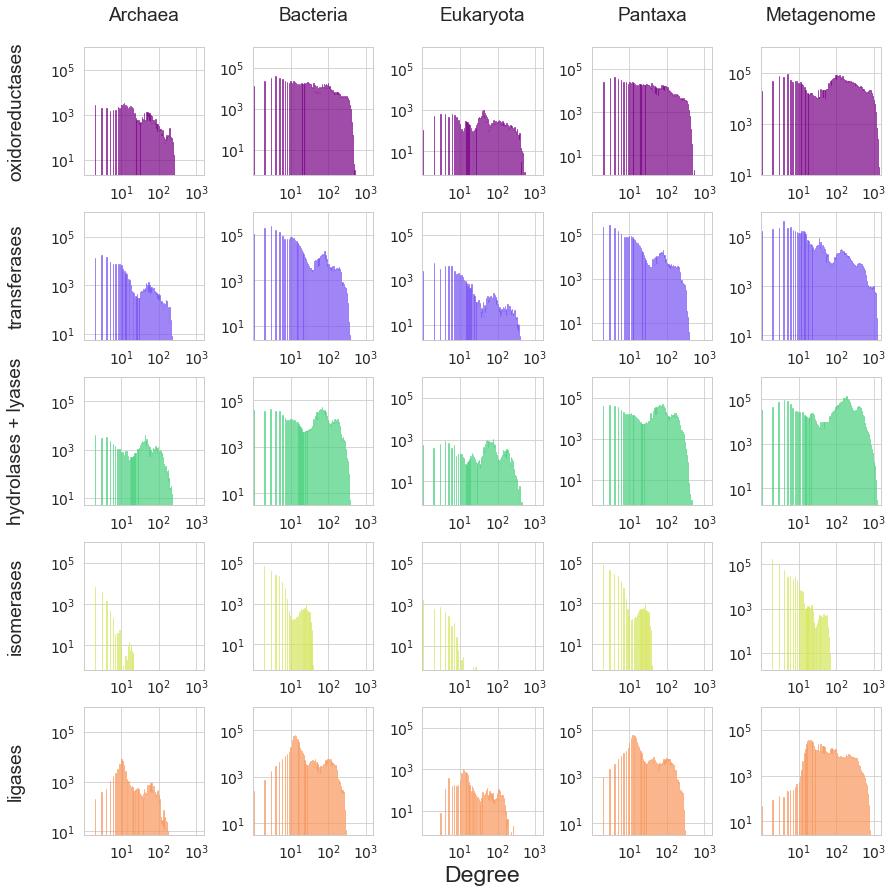

In [20]:
plt.figure(figsize=(2.5 * len(new_ec_class_name), 2.5 * len(list_domain))) #sharex=True, sharey=True)
j = 1
for ec_index in range(1, len(new_ec_class_name) + 2):
    i = 0
    for domain_index in range(len(list_domain)): #for ec_index in range(1, len(ec_class_name) + 1):

        print(domain_index + j)

        domain = list_domain[domain_index]
        plt.subplot(len(new_ec_class_name), len(list_domain), domain_index + j)
        if ec_index < 3:
            ec_class = str(ec_index) 
            x = data[domain][ec_class]
        if ec_index == 3:
            ec_class1 = str(ec_index)
            ec_class2 = str(ec_index + 1)
            x = data[domain][ec_class1] + data[domain][ec_class2]  
            ec_class = '3'
        if ec_index == 4:
            continue
        if ec_index > 4:
            ec_class = str(ec_index)
            x = data[domain][ec_class]
            ec_class = str(ec_index-1)

        x = [i for i in x if i > 0]
        lx = np.log10(x)  

        plt.hist(lx, histtype='step', bins=200, fill=True, log=True, alpha=0.7, label=new_ec_class_name[ec_class], color=ncolor[new_ec_class_name[ec_class]])
        ax = plt.gca()
        ax.tick_params(labelsize=14)
        ax.set_xlim([0,3.2])
        ax.set_ylim([0,1000000])
        plt.xticks([1, 2, 3], ['$10^{1}$', '$10^{2}$', '$10^{3}$'])
        plt.yticks([10, 1000, 100000], ['$10^1$', '$10^3$', '$10^5$'])

        if domain == archaea:
            plt.ylabel("%s\n"%new_ec_class_name[ec_class], fontsize= 19)
        if ec_index == 1:
            plt.title("%s\n"%domain.name, fontsize= 19)
        if domain == eukaryota and ec_index == 6:
            plt.xlabel("Degree", fontsize=23)

        i += 1
    j += i    

plt.tight_layout()
plt.savefig("../plots/PNAS/degree_distribution_HLcombined.png", dpi = 300)
